In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv


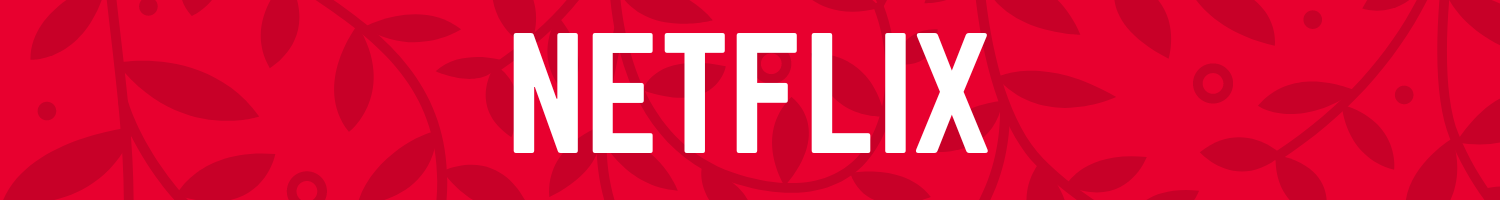

In [2]:
data_set = pd.read_csv("/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv")

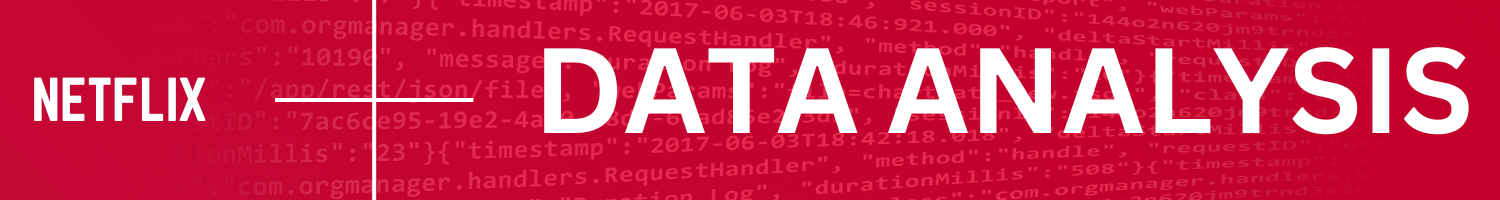

In [3]:
data_set.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [5]:
data_set.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


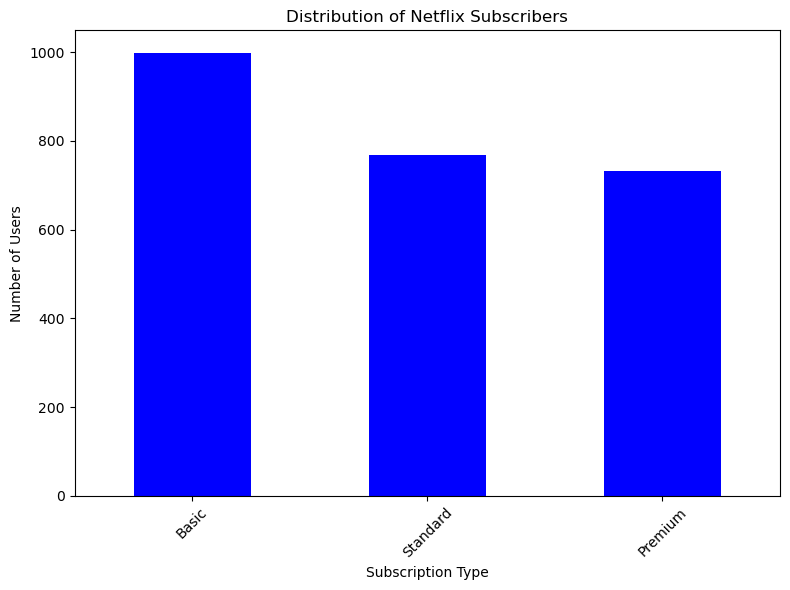

In [6]:
user_counts = data_set['Subscription Type'].value_counts()

plt.figure(figsize=(8, 6))
user_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Netflix Subscribers')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

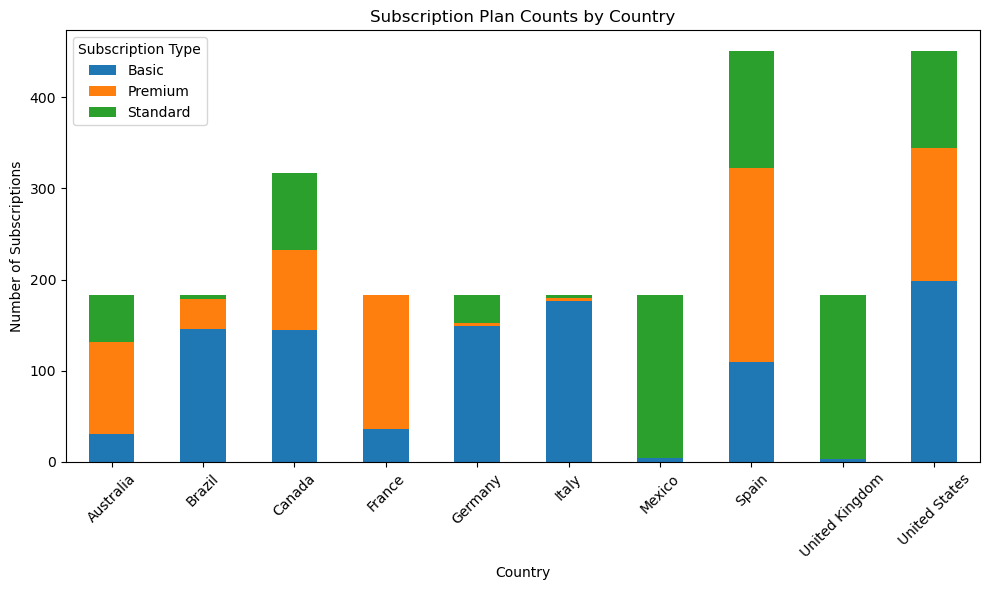

In [7]:
subscription_counts = data_set.groupby(['Country', 'Subscription Type'])['User ID'].count().unstack()

ax = subscription_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Subscription Plan Counts by Country')
plt.xlabel('Country')
plt.ylabel('Number of Subscriptions')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type')
plt.tight_layout()
plt.show()

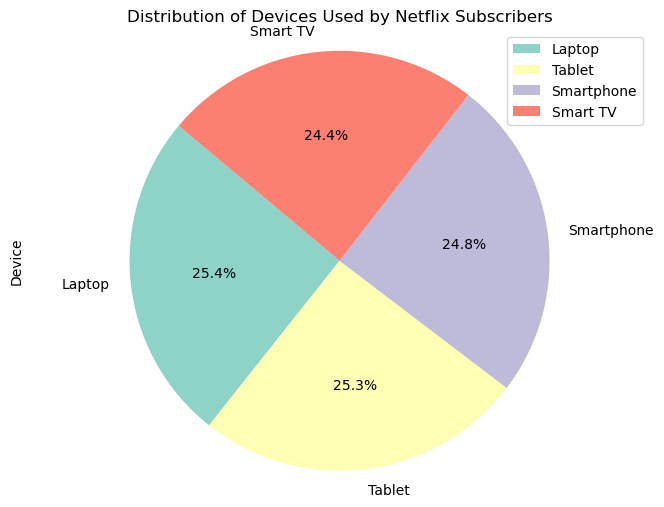

In [8]:
device_counts = data_set['Device'].value_counts()

plt.figure(figsize=(8, 6))
device_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Devices Used by Netflix Subscribers')
plt.axis('equal')
plt.legend(device_counts.index, loc='best')
plt.show()

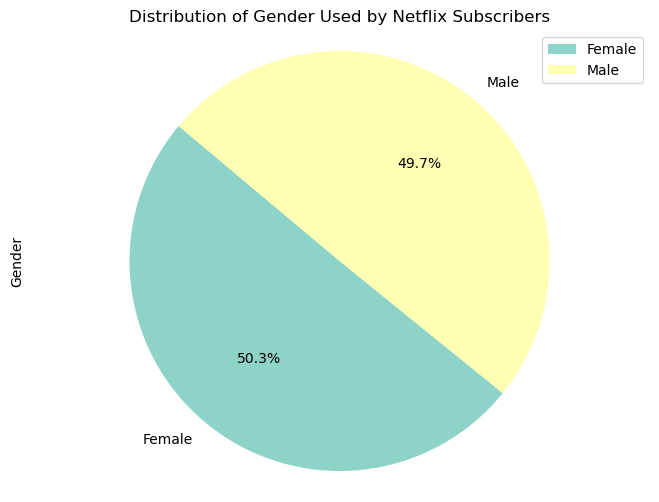

In [9]:
gender_counts = data_set['Gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Gender Used by Netflix Subscribers')
plt.axis('equal')
plt.legend(gender_counts.index, loc='best')
plt.show()

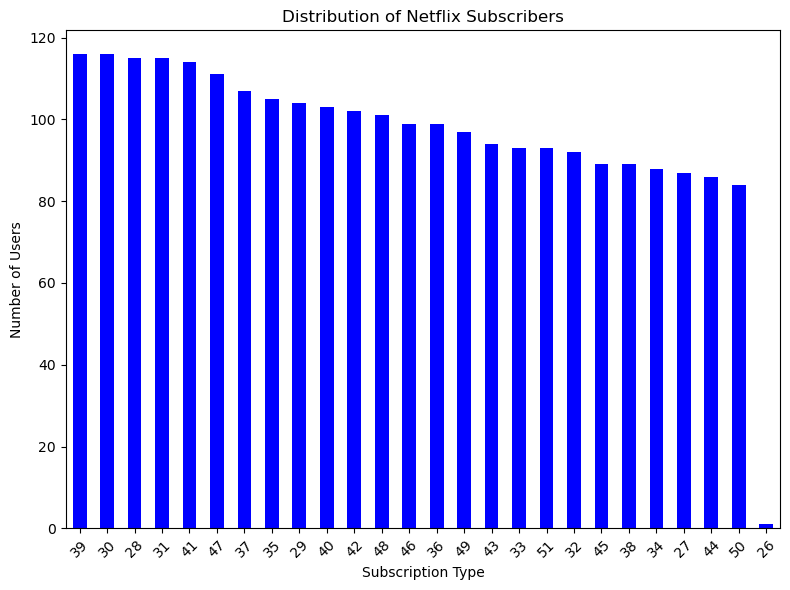

In [10]:
user_counts_age = data_set['Age'].value_counts()

plt.figure(figsize=(8, 6))
user_counts_age.plot(kind='bar', color='blue')
plt.title('Distribution of Netflix Subscribers')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
data_set['Join Date'] = pd.to_datetime(data_set['Join Date'], format='%d-%m-%y')
data_set['Last Payment Date'] = pd.to_datetime(data_set['Last Payment Date'], format='%d-%m-%y')
data_set['Duration (days)'] = (data_set['Last Payment Date'] - data_set['Join Date']).dt.days
data_set.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration (days)
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58


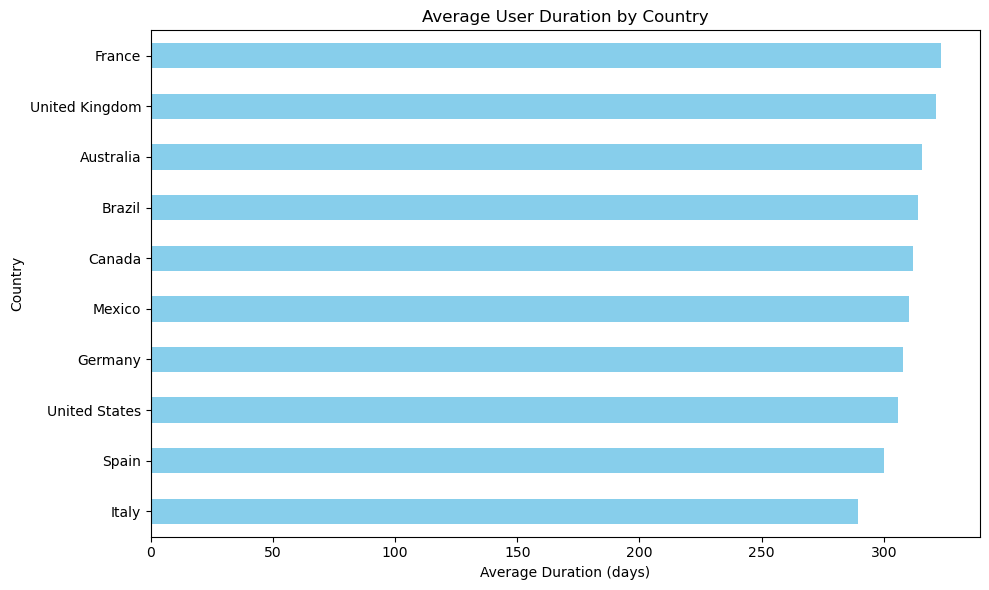

In [12]:
avg_duration_by_country = data_set.groupby('Country')['Duration (days)'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_duration_by_country.plot(kind='barh', color='skyblue')
plt.title('Average User Duration by Country')
plt.xlabel('Average Duration (days)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

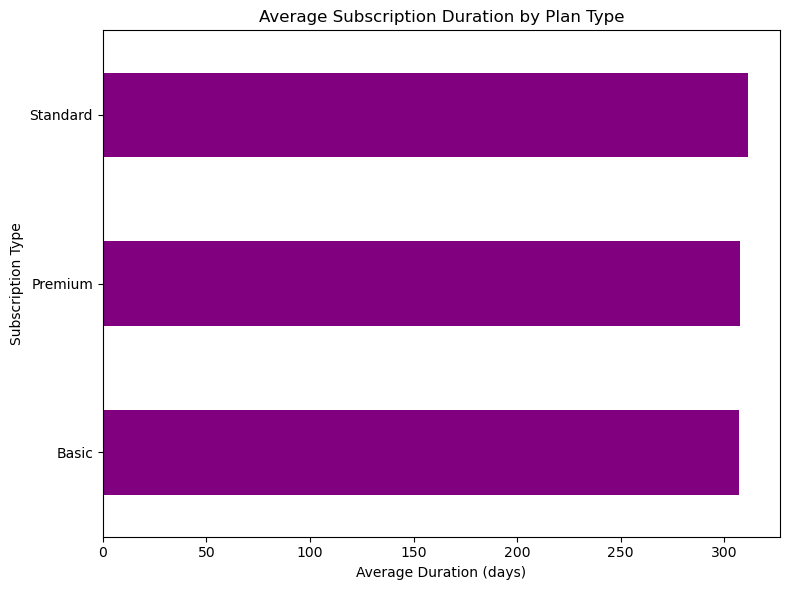

In [13]:
avg_duration_by_plan = data_set.groupby('Subscription Type')['Duration (days)'].mean()

plt.figure(figsize=(8, 6))
avg_duration_by_plan.sort_values().plot(kind='barh', color='purple')
plt.title('Average Subscription Duration by Plan Type')
plt.xlabel('Average Duration (days)')
plt.ylabel('Subscription Type')
plt.tight_layout()
plt.show()

In [14]:
data_set['Duration (months)'] = data_set['Duration (days)'] / 30  

data_set['Generated Revenue($)'] = data_set['Monthly Revenue'] * data_set['Duration (months)']

data_set.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration (days),Duration (months),Generated Revenue($)
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,17.033333,170.333333
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,21.833333,327.500000
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,3.966667,47.600000
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,11.700000,140.400000
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,1.933333,19.333333


In [15]:
data_set['Generated Revenue($)'].sum()

321674.6666666666

In [16]:
country_revenue = data_set.groupby('Country')['Generated Revenue($)'].sum().reset_index()


fig = px.choropleth(
    country_revenue,
    locations='Country',
    locationmode='country names',
    color='Generated Revenue($)',
    hover_name='Country',
    title='Total Monthly Revenue by Country on Choropleth Map',
    color_continuous_scale=px.colors.sequential.Plasma
)


fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
fig.update_layout(geo=dict(showcoastlines=True))
fig.update_geos(
    projection_scale=6, 
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="white"
)
fig.show()

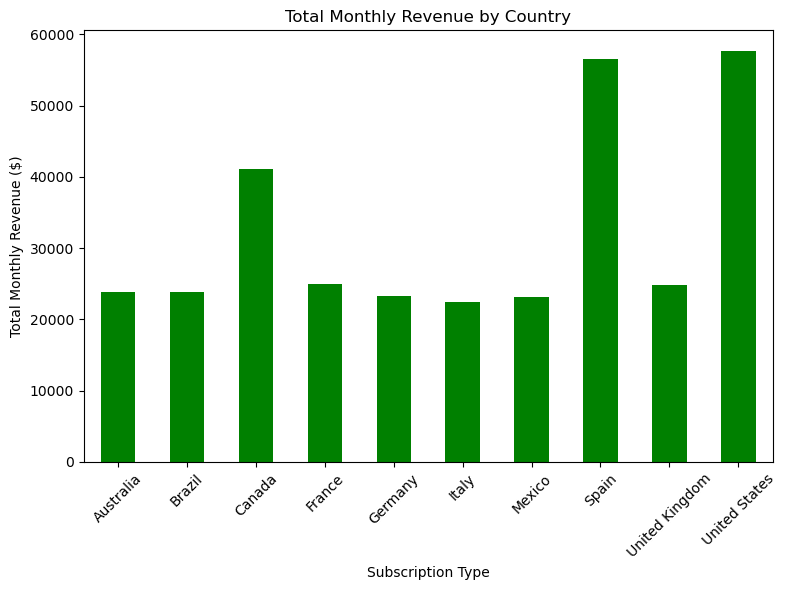

In [17]:
total_revenue_by_country = data_set.groupby('Country')['Generated Revenue($)'].sum()

plt.figure(figsize=(8, 6))
total_revenue_by_country.plot(kind='bar', color='green')
plt.title('Total Monthly Revenue by Country')
plt.xlabel('Subscription Type')
plt.ylabel('Total Monthly Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

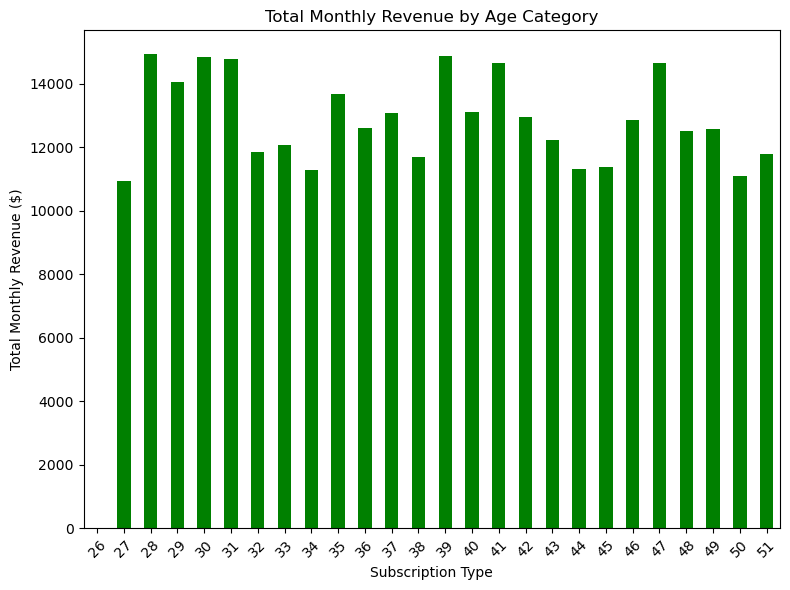

In [18]:
total_revenue_by_Age = data_set.groupby('Age')['Generated Revenue($)'].sum()

plt.figure(figsize=(8, 6))
total_revenue_by_Age.plot(kind='bar', color='green')
plt.title('Total Monthly Revenue by Age Category')
plt.xlabel('Subscription Type')
plt.ylabel('Total Monthly Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

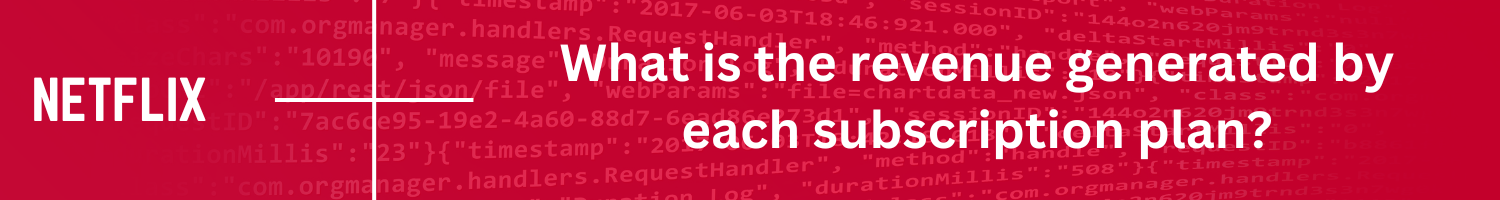

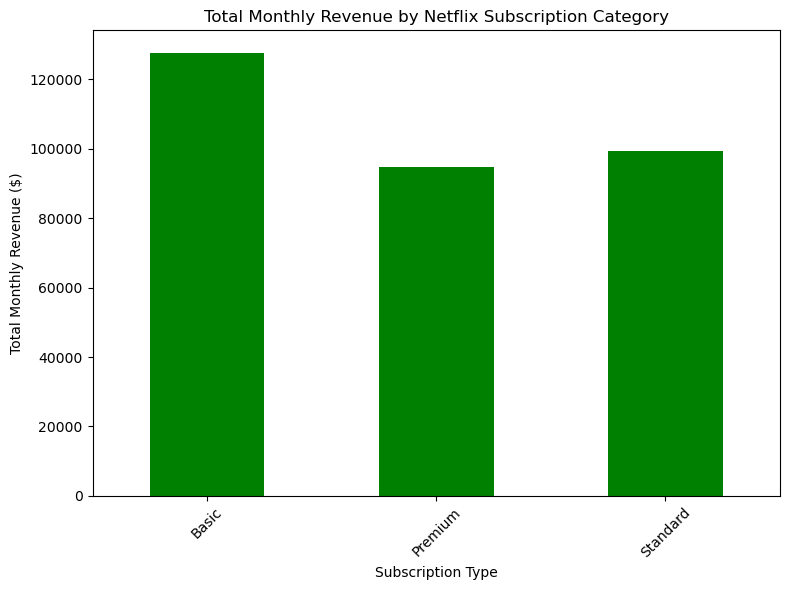

In [19]:
total_revenue_by_plan = data_set.groupby('Subscription Type')['Generated Revenue($)'].sum()

plt.figure(figsize=(8, 6))
total_revenue_by_plan.plot(kind='bar', color='green')
plt.title('Total Monthly Revenue by Netflix Subscription Category')
plt.xlabel('Subscription Type')
plt.ylabel('Total Monthly Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

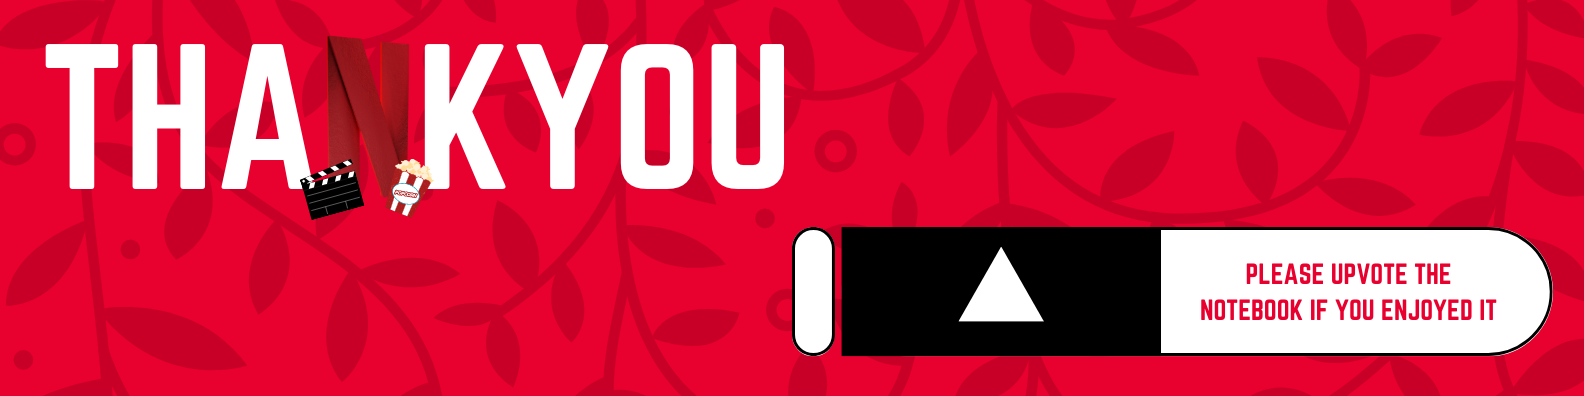